# Advent of Code
Charel Felten

In [173]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1. Advent

In [3]:
df = pd.read_csv("inputs/1", header=None)

f = lambda w: (df.rolling(w).sum().dropna().diff().fillna(0) > 0).sum().loc[0]

print(f"Task 1: {f(1)}, Task 2: {f(3)}")

Task 1: 1266, Task 2: 1217


## 2. Advent

In [4]:
df = pd.read_csv("inputs/2", header=None, sep=" ", names=["direction", "distance"])

t1 = df.groupby("direction").sum().apply(lambda col: (col["down"] - col["up"]) * col["forward"]).loc["distance"]

h, d, a = 0,0,0
for _, (dir, dis) in df.iterrows():
    if dir == "down": a += dis
    if dir == "up": a -= dis
    if dir == "forward":
        h += dis
        d += a*dis
        
print(f"Task 1: {t1}, Task 2: {h * d}")

Task 1: 1882980, Task 2: 1971232560


## 3. Advent

In [8]:
df = pd.read_csv("inputs/3", header=None, sep=" ", dtype="str")

t1 = df\
    .apply(lambda r: list(r.iloc[0]), result_type="expand", axis=1)\
    .agg(["median", lambda c: int(not(c.median()))])\
    .apply(lambda c: 2**((len(df.iloc[0,0])-1)-c.name) * c)\
    .sum(axis=1).prod().astype(int)

t2 = df.apply(lambda r: list(r.iloc[0]), result_type="expand", axis=1).astype(int)

def x(t2, b):
    for c in t2: t2 = t2[t2[c] == t2.groupby(c).size().sort_index(ascending=b).sort_values(ascending=b).index[0]]
    return t2.apply(lambda c: 2**((len(df.iloc[0,0])-1)-c.name) * c).sum(axis=1).iloc[0]

t2 = x(t2, False) * x(t2, True)

print(f"Task 1: {t1}, Task 2: {t2}")

Task 1: 4147524, Task 2: 3570354


## 4. Advent

In [188]:
inputs = pd.read_csv("inputs/4", header=None, nrows=1).to_numpy().reshape(-1)
boards = pd.read_csv("inputs/4", header=None, skiprows=[0], sep=r" +").to_numpy().reshape(-1, 5, 5)
bingos = np.zeros_like(boards, dtype=bool)

aw = {}
for inp in inputs:
    for match in np.argwhere(boards == inp):
        bingos[tuple(match)] = True
    
    hs = np.argwhere(bingos.sum(axis=1) == boards.shape[1])
    vs = np.argwhere(bingos.sum(axis=2) == boards.shape[1])
    
    nw = set(list(vs[:,0]) + list(hs[:,0]))

    if len(nw) == 1 and len(aw) == 0:
        w = nw.difference(aw).pop()
        t1 = inp * boards[w, ~bingos[w]].sum()

    if len(nw) == boards.shape[0]:
        l = nw.difference(aw).pop()
        t2 = inp * boards[l, ~bingos[l]].sum()
        break

    aw = nw

print(f"Task 1: {t1}, Task 2: {t2}")

Task 1: 34506, Task 2: 7686


## 5. Advent

Task 1: 8622, Task 2: 22037


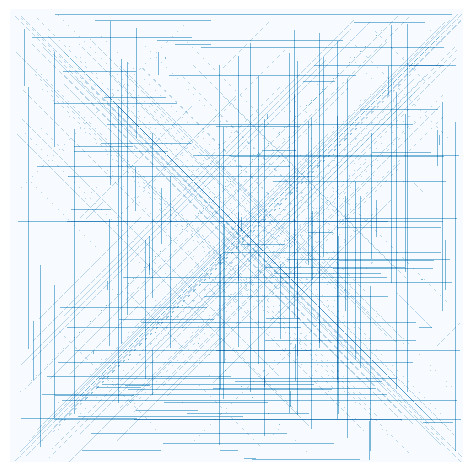

In [189]:
df = pd.read_csv("inputs/5", header=None, sep=r",| -> ", names=["x1", "y1", "x2", "y2"], engine="python")

M = np.zeros(shape=[2] + [df.max().max() + 1] * 2)

for _, (x1,y1,x2,y2) in df.iterrows():
    sx = 1 if x2-x1 > 0 else -1
    sy = 1 if y2-y1 > 0 else -1
    if x1 == x2 or y1 == y2:
        for x in range(x1, x2 + sx, sx):
            for y in range(y1, y2 + sy, sy):
                M[:,y,x] += 1
    else:
        for x,y in zip(range(x1, x2 + sx, sx), range(y1, y2 + sy, sy)):
            M[1,y,x] += 1

print(f"Task 1: {np.sum(M[0] > 1)}, Task 2: {np.sum(M[1] > 1)}")

plt.figure(figsize=(6,6), dpi=100)
plt.imshow(np.log(np.sum(M, axis=0)+1), interpolation="None", cmap="Blues")
plt.axis('off')
plt.show()